In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cmath
from scipy.integrate import quad

### Q.1.
#### Find the Fourier series associated with the function
 $$ f(x) =\begin{cases} 
    0 & \text{$-\pi \leq$ $x$ <0}\\ 
    \pi - x & \text{0 $\leq$ $x$ $\leq \pi$ }\\ 
    \end{cases} $$
#### Write a function to determine the coefficients a0, an, and bn. Plot the magnitude of the coefficients with |an| in blue colour and |bn| in red colour.

####  Fourier series representation of f(t):
$$f(t) = \frac{a_0}{2} + \sum_{n = 1}^{\infty}\Big(a_ncos(\frac{2\pi}{T}nt)+b_nsin(\frac{2\pi}{T}nt)\Big)$$
$$Where,a_0 = \frac{1}{T}\int_Tf(t)dt$$
$$a_n = \frac{2}{T}\int_Tf(t)cos(\frac{2\pi}{T}nt)dt$$
$$b_n = \frac{2}{T}\int_Tf(t)sin(\frac{2\pi}{T}nt)dt$$

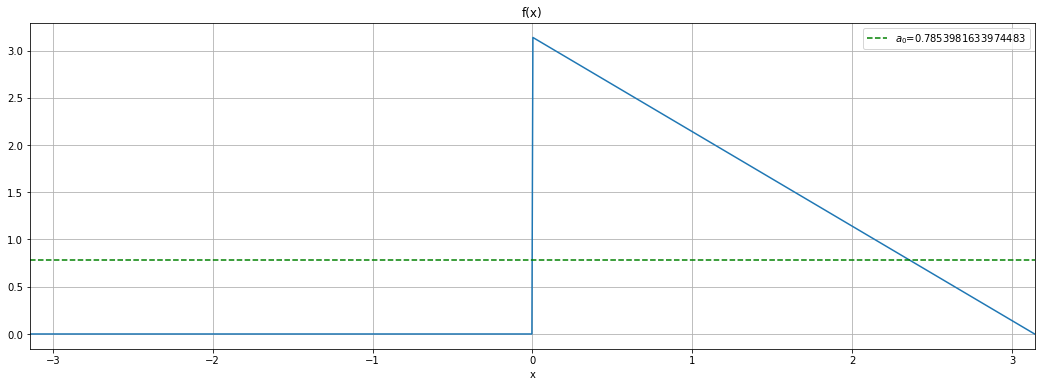

In [2]:
# x is continuous between -pi to pi

q1_t = np.linspace(-math.pi,math.pi,1000)

# Defining function as mentioned in question
q1_f = np.zeros(len(q1_t))
for i,t in enumerate(q1_t):
    if t>=0:
        q1_f[i] = math.pi - t

# Plotting the function
plt.figure(figsize=(18,6))
plt.plot(q1_t,q1_f)
plt.title('f(x)')
plt.xlabel('x')
plt.grid()

# Calculating fourier Series coefficients: a0

q1_T = 2*math.pi

q1_a0 = (quad(lambda x:math.pi-x,0,math.pi)[0])/q1_T

plt.axhline(q1_a0 ,ls = '--',c ='g',label =f'$a_0$={q1_a0}')
plt.xlim(-math.pi ,math.pi)
plt.legend()
plt.show()

##### The Fourier Series coefficients obtained are:
##### $a_0 = \frac{\pi}{4}$
##### $a_n = \frac{2}{\pi n^2}(1 - (-1)^n)$ , $n \ge 1$
##### $b_n = \frac{1}{n}$, $n \ge 1$

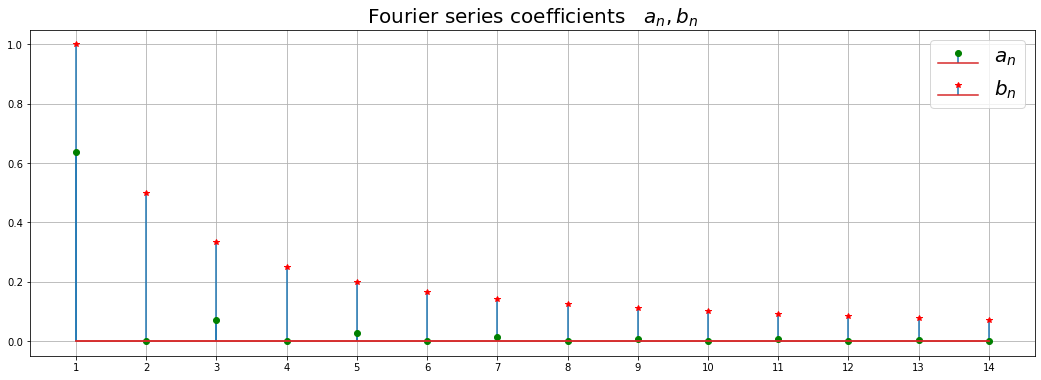

In [3]:
# Calculating Fourier Series Coefficients a_n and b_n

q1_an = []
q1_bn = []

# Calculating 15 coefficients
for i in range(1,15):
    a_n = 2*(quad(lambda x:(math.pi-x)*np.cos(i*x),0,math.pi)[0])/q1_T
    b_n = 2*(quad(lambda x:(math.pi-x)*np.sin(i*x),0,math.pi)[0])/q1_T
    
    q1_an.append(a_n)
    q1_bn.append(b_n)
    
plt.figure(figsize=(18,6))
plt.stem(np.arange(1,15),q1_an,markerfmt='og',label=r'$a_{n}$')
plt.stem(np.arange(1,15) ,q1_bn,markerfmt='*r',label=r'$b_{n}$')
plt.xticks(np.arange(1,15))
plt.grid()
plt.title('Fourier series coefficients   $a_n ,b_n$',size= 20)
plt.legend(prop = {'size':20})
plt.show()

### Q.2.
#### The saw-tooth wave f is shown in Figure 1:
#### (a) For the saw-tooth wave f, compute the Fourier series on the interval [-1,1]. Plot the magnitude of the coefficients
#### (b) For the Fourier series expression in (a), plot the partial sum of order  3 with red colour and the original saw-tooth wave f with blue colour. Compare the results on the same plot.
#### (c) Plot the partial sum of order 9 for the saw-tooth function with green colour and the original saw-tooth wave f with blue colour.
#### The plots obtained for (b) and (c) must be shown in different subplots and you should be able to explain your observation.

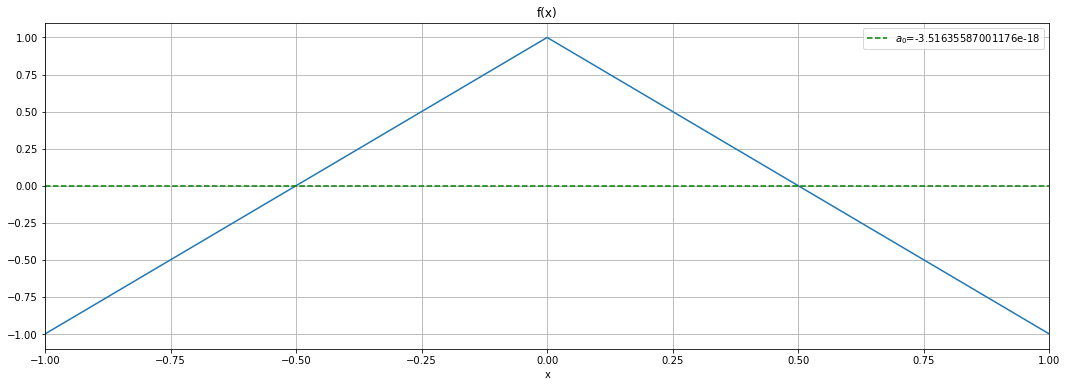

In [48]:
# Defining variables for given function
q2_t = [-1,0,1]
q2_f = [-1,1,-1]

plt.figure(figsize=(18,6))
plt.plot(q2_t,q2_f)
plt.title('f(x)')
plt.xlabel('x')
plt.grid()

q2_T = 2
q2_omega = 2*math.pi/q2_T

q2_a0 = (quad(lambda t:2*t+1,-1,0)[0] + quad(lambda t:-2*t+1,0,1)[0])/q2_T
           
plt.axhline(q2_a0 ,ls = '--',c ='g',label =f'$a_0$={q2_a0}')
plt.xlim(-1,1)
plt.legend()
plt.show()          

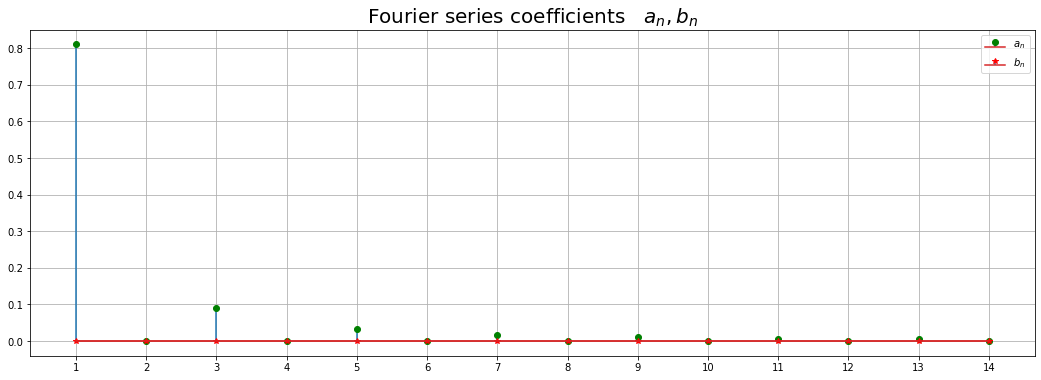

In [49]:
# Calculating Fourier Series Coefficients a_n and b_n

q2_an = []
q2_bn = []

for i in range(1,15):
    a_n = (2/q2_T)*(quad(lambda t:(2*t+1)*np.cos(i*q2_omega*t),-1,0)[0] + quad(lambda t:(-2*t+1)*np.cos(i*q2_omega*t),0,1)[0])
    b_n = (2/q2_T)*(quad(lambda t:(2*t+1)*np.sin(i*q2_omega*t),-1,0)[0] + quad(lambda t:(-2*t+1)*np.sin(i*q2_omega*t),0,1)[0])
    
    q2_an.append(a_n)
    q2_bn.append(b_n)
    
plt.figure(figsize=(18,6))
plt.stem(np.arange(1,15),q2_an,markerfmt='og',label=r'$a_{n}$')
plt.stem(np.arange(1,15) ,q2_bn,markerfmt='*r',label=r'$b_{n}$')
plt.xticks(np.arange(1,15))
plt.grid()
plt.title('Fourier series coefficients   $a_n ,b_n$' ,size= 20)
plt.legend()
plt.show()

In [6]:
# Partial Sum of order 3 

q2_t1 = np.linspace(-1,1,1000)

q2_f1 = np.zeros(len(q2_t1)) + q2_a0/2

# Adding constant dc term, sine and cosine term of frequency omega,2*omega, and 3*omega
for i in range(1,4):
    q2_f1 = q2_f1 + q2_an[i-1]*np.cos(i*q2_omega*q2_t1) + q2_bn[i-1]*np.sin(i*q2_omega*q2_t1)


# Partial Sum of order 9

q2_f2 = np.zeros(len(q2_t1)) + q2_a0/2

for i in range(1,10):
    q2_f2 = q2_f2 + q2_an[i-1]*np.cos(i*q2_omega*q2_t1) + q2_bn[i-1]*np.sin(i*q2_omega*q2_t1)


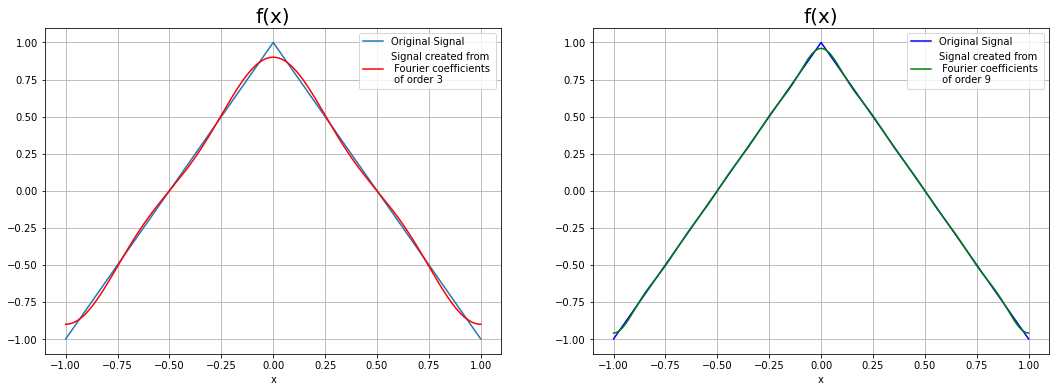

In [7]:
# Plotting the results

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q2_t,q2_f,label ='Original Signal' )
plt.plot(q2_t1,q2_f1,'r',label =f'Signal created from \n Fourier coefficients\n of order 3' )
plt.title('f(x)',size= 20)
plt.xlabel('x')
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(q2_t,q2_f,'b',label ='Original Signal' )
plt.plot(q2_t1,q2_f2,'g',label =f'Signal created from \n Fourier coefficients\n of order 9' )
plt.title('f(x)',size= 20)
plt.xlabel('x')
plt.legend()
plt.grid()

plt.show()

# From above it is evident that signal can be reconstructed effectively with fourier coefficients. The more the number of order,
# the more closer generated signal is to original signal

### Q.3.
#### The Fourier transform is given by
#### $$ X(\omega) = \int_{0}^{\infty} x(t) e^{-j\omega t} dt $$
#### Write your custom function which takes input from the below given signals and computes the magnitude and phase spectra (a > 0). Sketch x(t), |X(ω)|, and ∠X(ω) when A = 2 and a = 4.
#### (a) $$ x(t) = \begin{cases} 
    Ae^{-at} & \text{$t \geq 0$}\\ 
    0& \text{$ t <0$ }\\ 
    \end{cases} $$
#### (b) $$ x(t) = Ae^{-a|t|} $$

In [8]:
# Function to calculate continous time Fourier Transform

def Fourier_Trans(x,omega,low_lim=-np.inf,upp_lim=np.inf):
    
    real = []
    imag = []
    
    for i in omega:
        real.append(quad(eval('lambda t:' + x +f'* np.real(cmath.exp(-1j *{i}*t))'),low_lim,upp_lim)[0])
        imag.append(quad(eval('lambda t:' + x +f'* np.imag(cmath.exp(-1j *{i}*t))'),low_lim,upp_lim)[0])
    
    mag = np.sqrt(np.power(real,2)+np.power(real,2))
    phase = np.arctan2(imag,real)
    
    return mag,phase
    

In [9]:
# Taking frequency to be between -10 to 10
q3_omega = np.linspace(-10,10,200)

# Taking time to be between -1.5 to 1.5
q3_t = np.linspace(-1.5,1.5,200)
q3_A = 2
q3_a = 4

q3_func1 = np.zeros(len(q3_t))
q3_func2 = np.zeros(len(q3_t))

# Defining function as mentioned in question
for i,t in enumerate(q3_t):
    if t<0:
        q3_func1[i] = 0
        q3_func2[i] = q3_A*np.exp(q3_a*t)
    
    else:
        q3_func1[i] = q3_A*np.exp(-1*q3_a*t)
        q3_func2[i] = q3_A*np.exp(-1*q3_a*t)
    
q3_f1 = '2*np.exp(-4*t)'
q3_f2 = '2*np.exp(-4*abs(t))'

q3_mag1,q3_phase1 = Fourier_Trans(q3_f1,q3_omega,0,np.inf)
q3_mag2,q3_phase2 = Fourier_Trans(q3_f2,q3_omega)

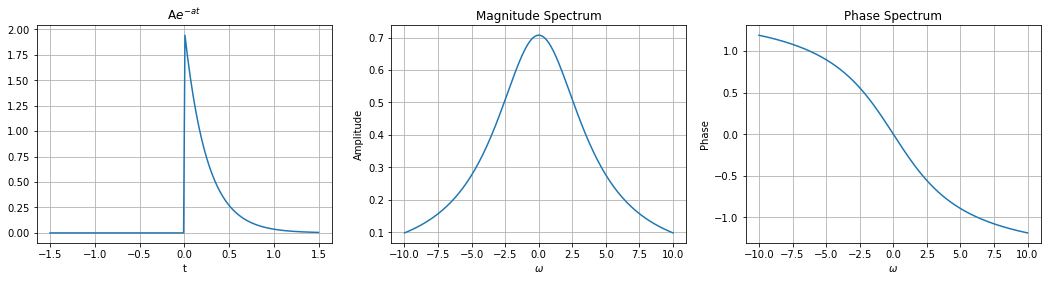

In [10]:
# Plotting result for part (a)
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.plot(q3_t,q3_func1)
plt.xlabel('t')
plt.title('A$e^{-at}$')
plt.grid()

plt.subplot(132)
plt.plot(q3_omega,q3_mag1)
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')
plt.title('Magnitude Spectrum')
plt.grid()

plt.subplot(133)
plt.plot(q3_omega,q3_phase1)
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('Phase Spectrum')
plt.grid()

plt.show()

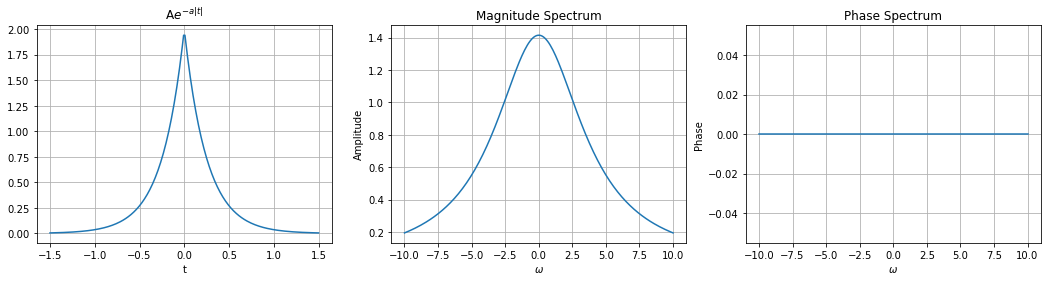

In [11]:
# Plotting result for part (b)
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.plot(q3_t,q3_func2)
plt.xlabel('t')
plt.title('A$e^{-a|t|}$')
plt.grid()

plt.subplot(132)
plt.plot(q3_omega,q3_mag2)
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')
plt.title('Magnitude Spectrum')
plt.grid()

plt.subplot(133)
plt.plot(q3_omega,q3_phase2)
plt.xlabel('$\omega$')
plt.ylabel('Phase')
plt.title('Phase Spectrum')
plt.grid()

plt.show()

### Q.4.
#### Determine and sketch XR(ω), XI (ω), |X(ω)|, and ∠X(ω) for the Fourier transform:
$$ X(\omega) = \frac{1}{1-ae^{-j\omega}}  -1 \leq a \leq 1 $$
#### Show the graphical representation of the spectra for a = 0.8

In [12]:
# Taking frequency in between -6 to 6 (to show repetition)
q4_omega = np.linspace(-10,10,2000)
q4_a = 0.8
q4_x = np.zeros(len(q4_omega),dtype=np.complex64)

for i,omg in enumerate(q4_omega):
    q4_x[i] = 1/(1-q4_a*np.exp(-1j*omg))

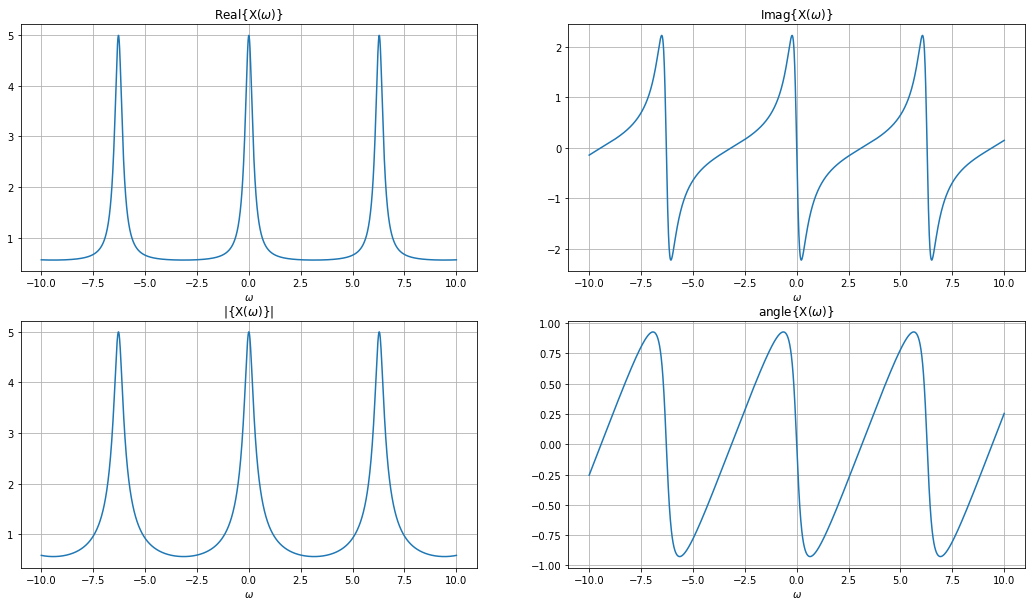

In [13]:
# Plotting the result
plt.figure(figsize=(18,10))

plt.subplot(221)
plt.plot(q4_omega,q4_x.real)
plt.xlabel('$\omega$')
plt.title('Real{X($\omega$)}')
plt.grid()

plt.subplot(222)
plt.plot(q4_omega,q4_x.imag)
plt.xlabel('$\omega$')
plt.title('Imag{X($\omega$)}')
plt.grid()

plt.subplot(223)
plt.plot(q4_omega,abs(q4_x))
plt.xlabel('$\omega$')
plt.title('|{X($\omega$)}|')
plt.grid()

plt.subplot(224)
plt.plot(q4_omega,np.angle(q4_x))
plt.xlabel('$\omega$')
plt.title('angle{X($\omega$)}')
plt.grid()

### Q.5.
#### Determine the Fourier transform of the signal: $ x(n) = a^{|n|} $
#### Plot x(n) and X(ω) with a = 0.6.

In [14]:
# Taking n to be in between -10 and 10 in steps of 1
q5_n = np.arange(-10,10,1)
q5_omega = np.linspace(-10,10,200)
q5_a = 0.6

q5_x = np.power(q5_a,abs(q5_n))

In [15]:
# Function to calculate Discrte Time Fourier Transform
def Dis_fourier_trans(x,omega):
    
    x = np.array(x)
    l = len(x)
    dis_fourier = []
    
    for i in omega:
        temp = 0
        for n in range(l):
            temp = temp + x[n]*np.exp(-1j*i*n)
         
        dis_fourier.append(temp)
    
    dis_fourier = np.array(dis_fourier)
    return abs(dis_fourier)

In [16]:
# Calculating DTFT for given signal
q5_mag = Dis_fourier_trans(q5_x,q5_omega)

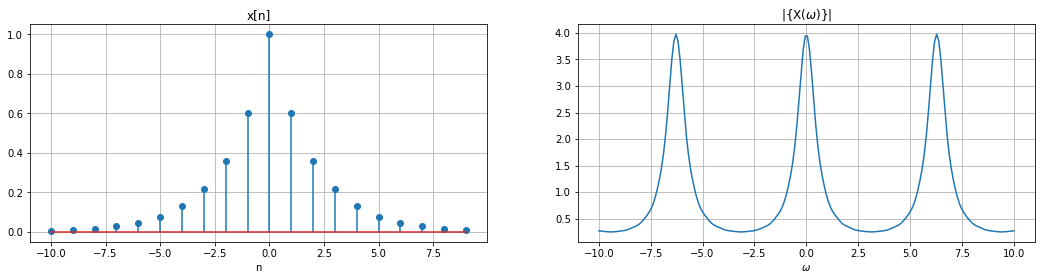

In [17]:
# Plotting the result
plt.figure(figsize=(18,4))

plt.subplot(121)
plt.stem(q5_n,q5_x)
plt.xlabel('n')
plt.title('x[n]')
plt.grid()

plt.subplot(122)
plt.plot(q5_omega,q5_mag)
plt.xlabel('$\omega$')
plt.title('|{X($\omega$)}|')
plt.grid()

plt.show()

### Q.6. 
#### (a) Generate 3 sine waves with frequencies 2 Hz, 5 Hz, and 8 Hz, having amplitudes of 3, 2, and 1,  espectively, and all phases as zeros. Add the 3 sine waves together with a sampling rate fs = 100 Hz. Plot the resultant signal for a time duration of 1 sec.
#### (b) Write a function for discrete Fourier transform (DFT) as DFT(x) which takes in an input argument x, which is a 1-dimensional realvalued signal. The function has to calculate the DFT of the signal and return the DFT values. Apply this function to the signal generated in (a) and plot the result. Verify that the output of the DFT is symmetric.
#### (c) Filter out the DFT results to obtain only the frequency components of (a) and plot the resultant. That is, filter the frequency components which is greater than fs/2.

In [18]:
# Defining all the variables

q6_fs = 100
q6_f1 = 2
q6_f2 = 5
q6_f3 = 8
q6_a1 = 3
q6_a2 = 2
q6_a3 = 1

In [19]:
# Taking time interval of 1 second in steps of 1/sampling frequency
q6_t = np.arange(0,1,1/q6_fs)

# Function to calculate sinesoid
def sin_wave(a,f,phase,t):
    sine = a*np.sin(2*math.pi*f*t+phase)
    return sine

In [20]:
# Sinusoid of 3 different frequency
q6_sine1 = sin_wave(q6_a1,q6_f1,0,q6_t)
q6_sine2 = sin_wave(q6_a2,q6_f2,0,q6_t)
q6_sine3 = sin_wave(q6_a3,q6_f3,0,q6_t)

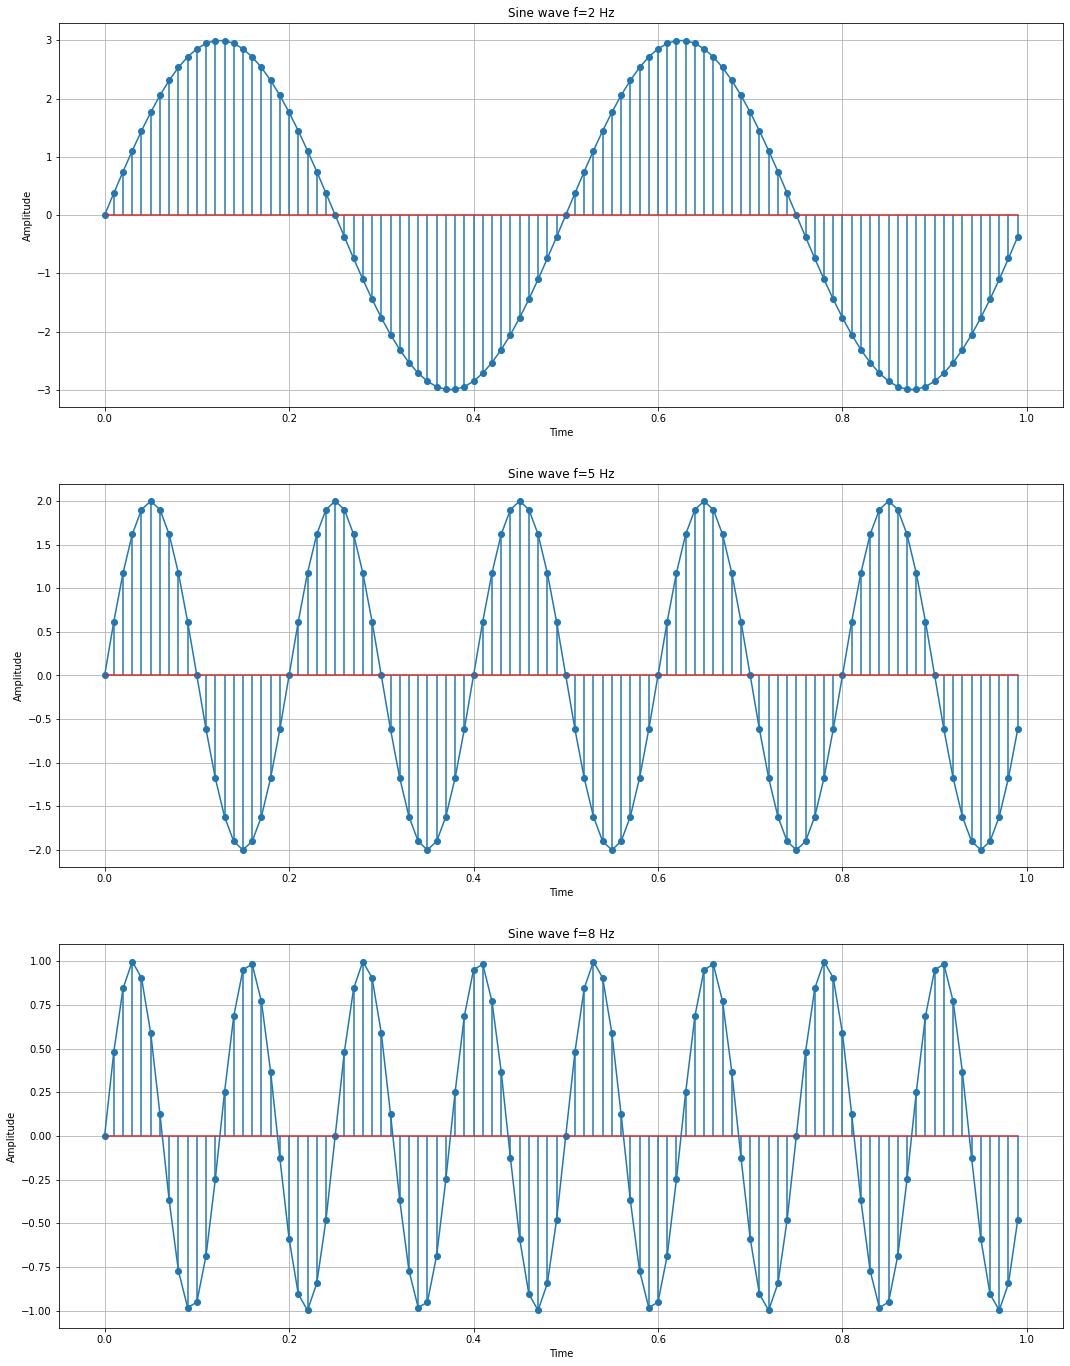

In [21]:
plt.figure(figsize=(18,24))

plt.subplot(311)
plt.stem(q6_t,q6_sine1)
plt.plot(q6_t,q6_sine1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave f='+str(q6_f1)+' Hz')
plt.grid()

plt.subplot(312)
plt.stem(q6_t,q6_sine2)
plt.plot(q6_t,q6_sine2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave f='+str(q6_f2)+' Hz')
plt.grid()

plt.subplot(313)
plt.stem(q6_t,q6_sine3)
plt.plot(q6_t,q6_sine3)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine wave f='+str(q6_f3)+' Hz')
plt.grid()

plt.show()

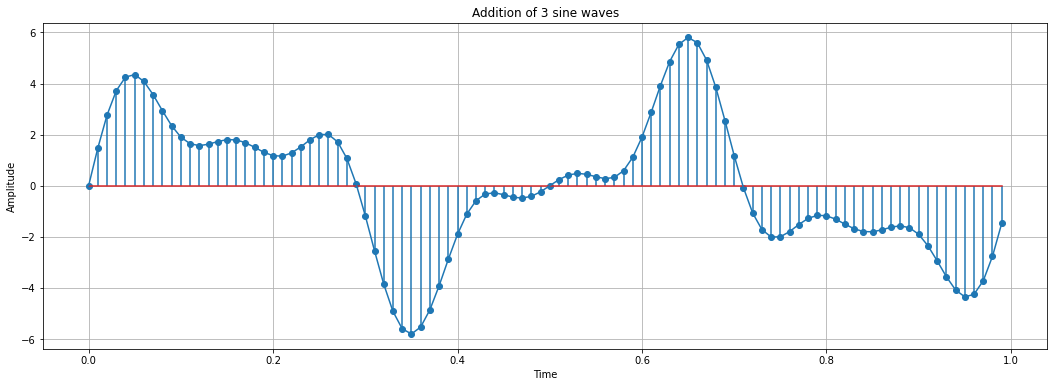

In [22]:
q6_sine_added = q6_sine1 + q6_sine2 + q6_sine3

plt.figure(figsize=(18,6))
plt.stem(q6_t,q6_sine_added)
plt.plot(q6_t,q6_sine_added)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Addition of 3 sine waves')
plt.grid()

In [23]:
# Function to calculate DFT of a signal

def DFT(x):
    N = len(x)
    W_mat = np.zeros((N,N),dtype=np.complex64)
    
    for k in range(N):
        for n in range(N):
            W_mat[k][n] = np.exp(-2j*math.pi*k*n/N)
    
    DFT_val = np.dot(W_mat,x)
    return DFT_val

In [24]:
# Calculating DFT of signal generated by adding 3 sine waves of different frequencies

q6_DFT_sine = DFT(q6_sine_added)

# Calculating frequency values corresponding to each point
q6_freq_val = np.arange(len(q6_sine_added))

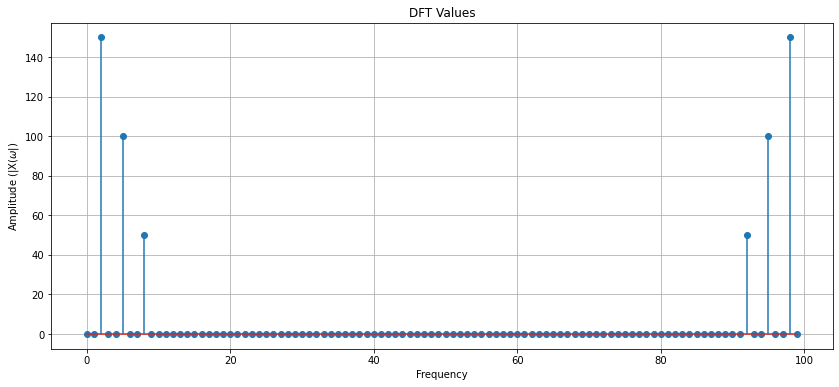

In [25]:
plt.figure(figsize=(14,6))
plt.stem(q6_freq_val,abs(q6_DFT_sine))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.grid()

plt.show()

# It is clear from below plot that DFT values if symmetric about half the sampling frequency

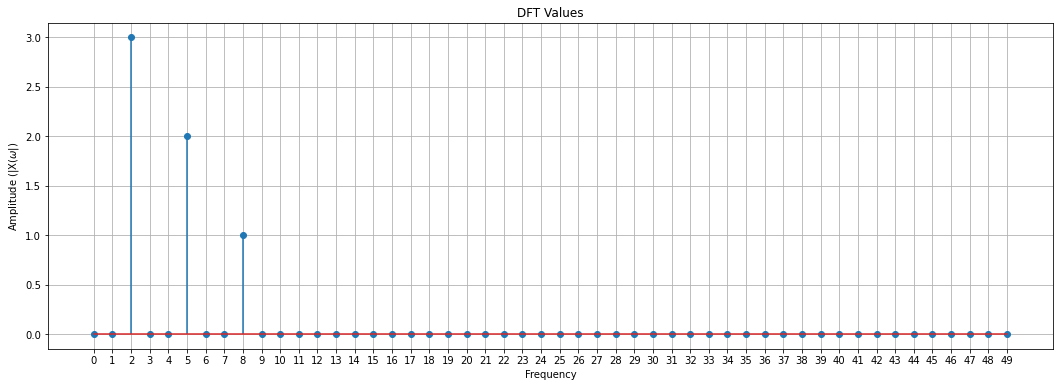

In [26]:
q6_half_freq = len(q6_sine_added)//2

q6_freq_val_half = q6_freq_val[:q6_half_freq]
q6_DFT_sine_half = q6_DFT_sine[:q6_half_freq]/q6_half_freq

plt.figure(figsize=(18,6))
plt.stem(q6_freq_val_half,abs(q6_DFT_sine_half))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.xticks(np.arange(0,50,1))
plt.grid()

plt.show()

### Q.7.
#### (a) Generate a sinewave of 100 Hz for 1 sec duration. Choose sampling rate, fs = 200 Hz.
#### (b) Find its true spectrum.
#### (c) Generate rectangular windows of length 80 and 160 samples.
#### (d) Plot the two window functions in time and frequency domains. Note down your observations about main lobe, side lobe, and other factors which you may observe
#### (e) Multiply sinewave using rectangular window of duration 80 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).
#### (f) Multiply sinewave using rectangular window of duration 160 samples. Compute the DFT spectrum and note down your observation on obtained spectrum by comparing it with true spectrum in (b).

In [27]:
# Generating a sinesoid signal with phase angle of pi/2

q7_f = 100
q7_fs = 200
q7_a = 1

q7_t = np.arange(0,1,1/q7_fs) # Sampling with frequency of 200 Hz
q7_sine = sin_wave(q7_a,q7_f,math.pi/2,q7_t)  #Using Function defined in Q1

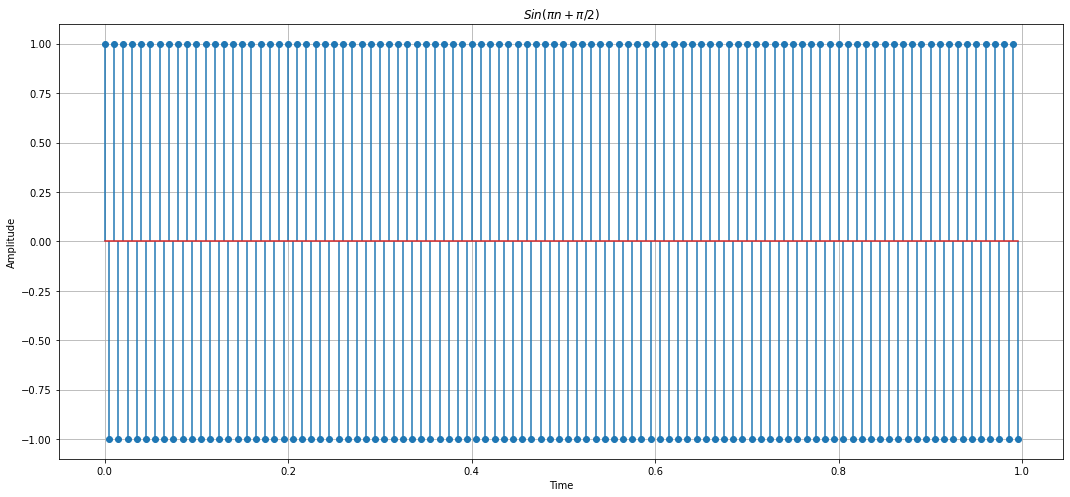

In [28]:
# Plotting the result
plt.figure(figsize=(18,8))
plt.stem(q7_t,q7_sine)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('$ Sin(\pi n+\pi /2)$')
plt.grid()
plt.show()

In [29]:
# Calculating DFT using function defined in Q6
q7_DFT_sine = DFT(q7_sine)

# Calculating frequency values corresponding to each point
q7_freq_val = np.arange(len(q7_sine))

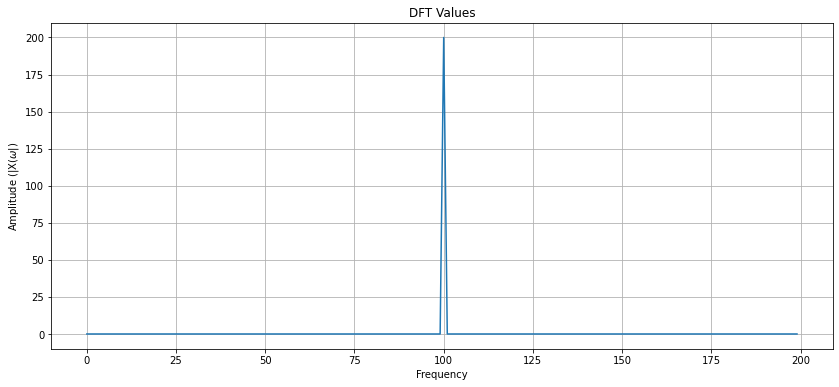

In [30]:
plt.figure(figsize=(14,6))
plt.plot(q7_freq_val,abs(q7_DFT_sine))
plt.xlabel('Frequency')
plt.ylabel('Amplitude (|X($\omega$|)')
plt.title('DFT Values')
plt.grid()

plt.show()

In [31]:
# Generating rectangular windows of 80 and 160 samples
# Function to generate rectangular window of M samples

def rect_wind(M,sam_rate=200):
    rect_n = np.arange(0,1,1/sam_rate)
    rect_val = np.zeros(sam_rate)
    
    for i,k in enumerate(rect_n):
        if k>=(0.5-M/(2*sam_rate)) and k<(0.5+M/(2*sam_rate)):
            rect_val[i] = 1
            
    return (rect_n,rect_val)

In [32]:
q7_rect1 = rect_wind(80)
q7_rect2 = rect_wind(160)

# Shifting the DFT result, to make the center the half the sampling frequency, for better observation of result
q7_rect_DFT1 = np.fft.fftshift(DFT(q7_rect1[1]))
q7_rect_DFT2 = np.fft.fftshift(DFT(q7_rect2[1]))

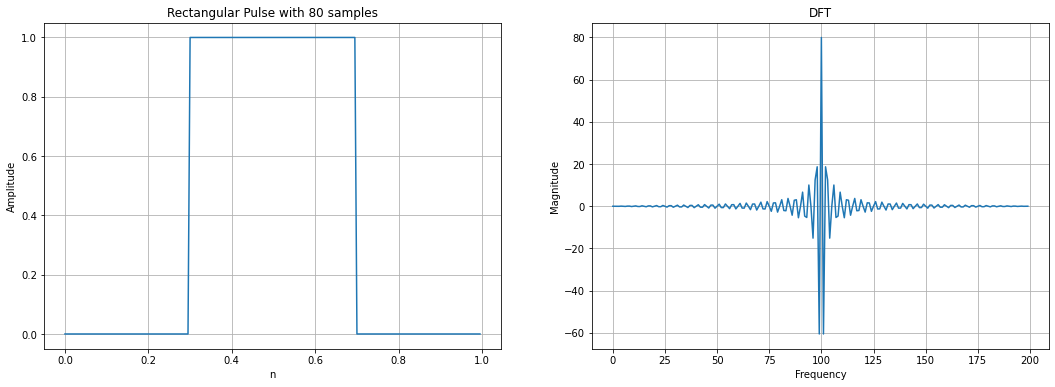

In [33]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q7_rect1[0],q7_rect1[1])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 80 samples')
plt.grid()

plt.subplot(122)
plt.plot(q7_rect_DFT1.real)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.grid()

plt.show()

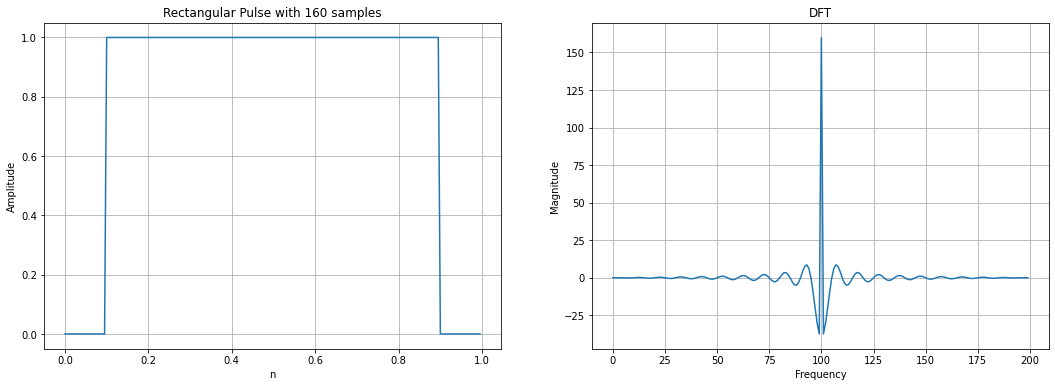

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q7_rect2[0],q7_rect2[1])
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Rectangular Pulse with 160 samples')
plt.grid()

plt.subplot(122)
plt.plot(q7_rect_DFT2.real)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.grid()

plt.show()

# From above 2 plots, the main width of main lobe is dependent of number of samples taken, more the number of samples
# smaller the width of main lobe
# side lobes are symmetric about center

In [35]:
q7_sine_rect1 = np.multiply(q7_sine,q7_rect1[1])
q7_sine_rect2 = np.multiply(q7_sine,q7_rect2[1])

In [36]:
q7_sine_rect_DFT1 = np.fft.fft(q7_sine_rect1)
q7_sine_rect_DFT2 = DFT(q7_sine_rect2)

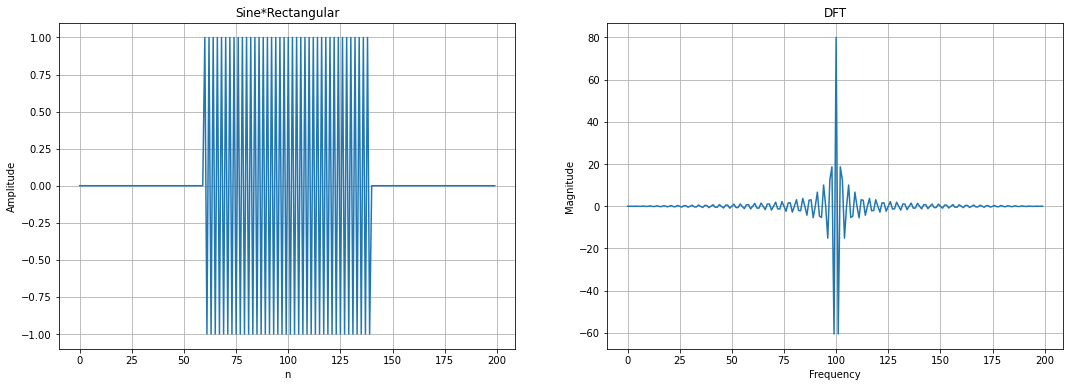

In [37]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q7_sine_rect1)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular')
plt.grid()

plt.subplot(122)
plt.plot(q7_sine_rect_DFT1.real)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.grid()

plt.show()

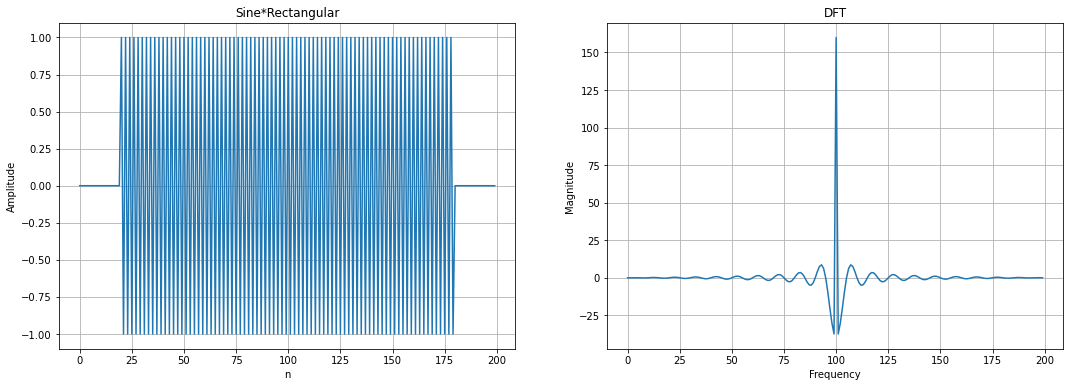

In [38]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(q7_sine_rect2)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sine*Rectangular')
plt.grid()

plt.subplot(122)
plt.plot(q7_sine_rect_DFT2.real)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT')
plt.grid()
plt.show()


# Comparing it to part b,we observe that there is a impulse at 100 Hz which is frequency component present in original sine wave